<h1><b>Handwritten digit detection | Multi-class Logistic regression
| pre-defined data set in sklearn module</b></h1>

In [39]:
%matplotlib inline
import pandas as pd
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

In [40]:
#load the dataset
digits = load_digits()
dir(digits)
#digits has following attributes 
#The attribute 'data' consists of 1D array representation of handwritten image
#The attribute 'images' consists of handwritten image with 8x8 pixels quality.
#The attribute 'target' consists of numerical digit corresponding to the image.

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

digits.data[0] =  [ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]
digits.images[0] =  [[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


<Figure size 432x288 with 0 Axes>

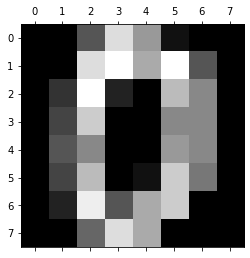

In [41]:
print("digits.data[0] = ",digits.data[0])
print("digits.images[0] = ", digits.images[0])
plt.gray()
plt.matshow(digits.images[0])

In [42]:
(x_train, x_test, y_train, y_test) = train_test_split(digits.data, digits.target)

In [43]:
print("Shape of x_train = ", x_train.shape)
print("Shape of y_train = ", y_train.shape)
print("Shape of x_test = ", x_test.shape)
print("Shape of digits.images = ", digits.images.shape)
print("Shape of digits.images[0] = ", digits.images[0].shape)

Shape of x_train =  (1347, 64)
Shape of y_train =  (1347,)
Shape of x_test =  (450, 64)
Shape of digits.images =  (1797, 8, 8)
Shape of digits.images[0] =  (8, 8)


In [44]:
#create and train our model
log_model = LogisticRegression()
log_model.fit(x_train, y_train)

C:\Users\ELCOT\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [45]:
#check the accuracy of our model
log_model.score(x_test, y_test)

0.96

In [46]:
print(log_model.predict([x_test[67]]))
print(log_model.predict(x_test[0:5]))

[5]
[9 1 7 6 8]


<h1>If you look at the accuracy of our model we created.
It is 0.95. From that we know that our model has did a mistake. Inorder to find out where our model did the mistakes we need to plot it using confusion matrix.</h1>

In [47]:
from sklearn.metrics import confusion_matrix
y_predicted = log_model.predict(x_test)
conf_matrix = confusion_matrix(y_predicted, y_test)
conf_matrix

array([[47,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 49,  1,  0,  0,  0,  1,  0,  4,  0],
       [ 1,  0, 38,  0,  0,  0,  0,  0,  1,  0],
       [ 0,  0,  0, 49,  0,  0,  0,  0,  0,  1],
       [ 0,  0,  0,  0, 50,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0, 35,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  0, 41,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  0,  0, 43,  0,  0],
       [ 0,  1,  0,  2,  0,  0,  0,  0, 34,  1],
       [ 0,  0,  0,  1,  0,  0,  0,  0,  1, 46]], dtype=int64)

Text(33.0, 0.5, 'Truth')

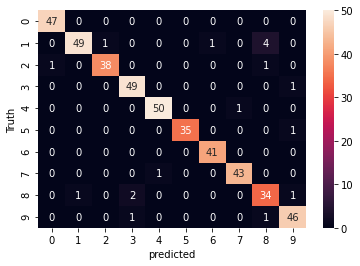

In [48]:
#view the confusion matrix with some graphics design use sea-born module
import seaborn as sn
sn.heatmap(conf_matrix, annot=True, fmt="d")
plt.xlabel("predicted")
plt.ylabel("Truth")

<h1>You cannot plot the logistic regression curve because we have different 
size of x and y values</h1>

ValueError: x and y must be the same size

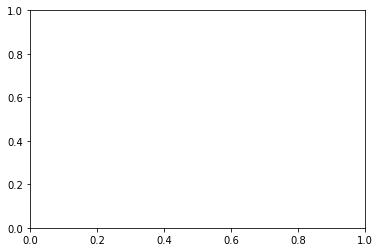

In [49]:
plt.scatter(x_train, y_train, color="red", marker="+")